In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
true_value = 5
sigma = 2
true_variance = sigma**2
num_simulations = 1000
n = 100
A = np.array(range(-10,10))
mean_bias = []
median_bias = []
mean_mse = []
median_mse = []

In [3]:
for _ in range(num_simulations):
    samples = np.random.normal(true_value, 2, size=n)
    mean_estimate = np.mean(samples)
    median_estimate = np.median(samples)
    
    mean_bias.append(mean_estimate - true_value)
    median_bias.append(median_estimate - true_value)

    mean_mse.append((mean_estimate -  true_value)**2)
    median_mse.append((median_estimate - true_value)**2)

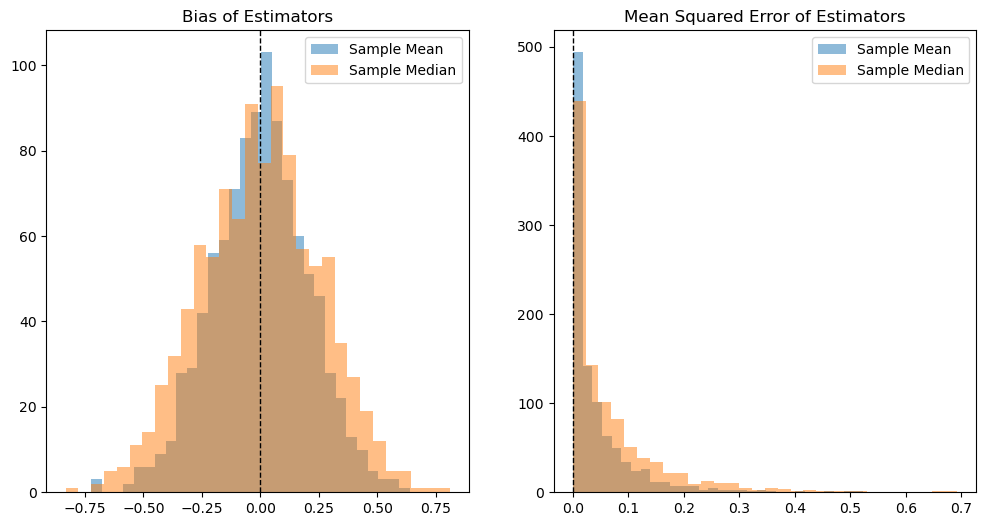

In [4]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(mean_bias, bins=30, alpha=0.5, label="Sample Mean")
plt.hist(median_bias, bins=30, alpha=0.5, label="Sample Median")
plt.axvline(0, color='k', linestyle='dashed', linewidth=1)
plt.title("Bias of Estimators")
plt.legend()
plt.subplot(1, 2, 2)
plt.hist(mean_mse, bins=30, alpha=0.5, label="Sample Mean")
plt.hist(median_mse, bins=30, alpha=0.5, label="Sample Median")
plt.title("Mean Squared Error of Estimators")
plt.legend()
plt.axvline(0, color='k', linestyle='dashed', linewidth=1)


In [5]:
def var_bias():
    variance_estimates_dist = np.empty((10000,20))
    for i in range(10000):    
        dist = np.random.normal(true_value, sigma, size=100)
        for j, a in enumerate(A): 
            variance_estimates_dist[i][j] = dist.var(ddof=a)
    return variance_estimates_dist

In [6]:
variance_estimates_dist = var_bias().transpose()

In [7]:
variance_bias = np.empty(20)
err_bar = np.empty(20)
for i,a in enumerate(A):
    variance_bias[i] = variance_estimates_dist[i].mean() - true_variance

In [8]:
variance_bias.std()/20

0.011396208053870555

In [9]:
y_err = variance_bias.std()/len(variance_bias)

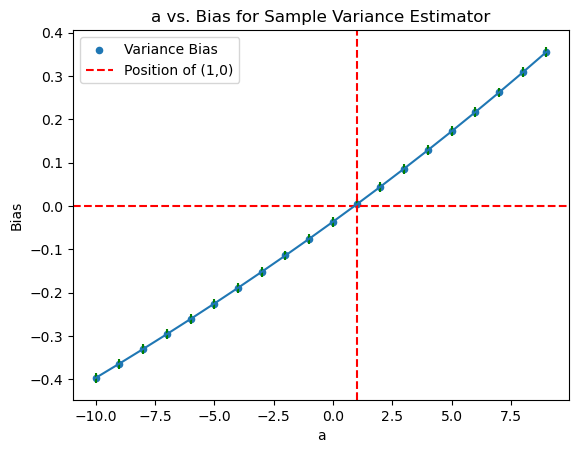

In [10]:
plt.scatter(A, variance_bias, s=20)
plt.errorbar(A, variance_bias, yerr=  y_err, ecolor='green')
plt.xlabel("a")
plt.ylabel("Bias")
plt.title("a vs. Bias for Sample Variance Estimator")
plt.axvline(1, color='r', linestyle = '--')
plt.axhline(0, color='r', linestyle = '--')
plt.legend(['Variance Bias', 'Position of (1,0)'])